In [11]:
import math

warmup_iters = 2000
learning_rate = 6e-4
total_iters=600000
lr_decay_iters = 600000 # should be ~= max_iters per Chinchilla
min_lr = 6e-5 # minimum learning rate, should be ~= learning_rate/10 per Chinchilla

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * (it + 1) / (warmup_iters + 1)
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

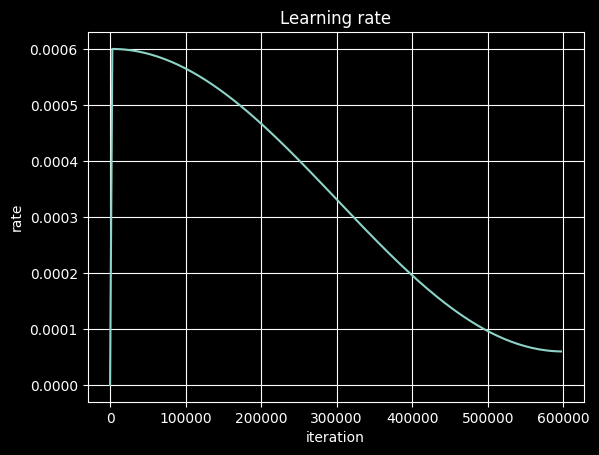

In [12]:
import matplotlib.pyplot as plt

details=200
x = [x * total_iters / details for x in range(details)]

y = [get_lr(x) for x in x]

plt.plot(x, y)
plt.xlabel('iteration')
plt.ylabel('rate')
plt.title('Learning rate')
plt.grid(True)
plt.show()

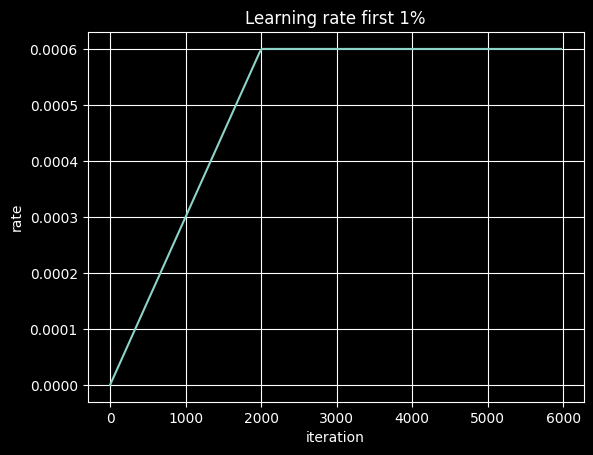

In [15]:
x = [x * total_iters / details / 100 for x in range(details)]

y = [get_lr(x) for x in x]

plt.plot(x, y)
plt.xlabel('iteration')
plt.ylabel('rate')
plt.title('Learning rate first 1%')
plt.grid(True)
plt.show()